## CNN CIFAR10 TENSORFLOW

#### Import Necesssary Libraries

In [69]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import os

#### Load Dataset

In [55]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [56]:
X_train.shape

(50000, 32, 32, 3)

In [57]:
y_train.shape

(50000, 1)

In [58]:
X_test.shape

(10000, 32, 32, 3)

In [59]:
y_test.shape

(10000, 1)

#### Reshape

In [60]:
y_train = y_train.reshape(-1, )

In [61]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [62]:
y_classes = ["airplane", "automibile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

#### Observe Dataset

In [63]:
def showImage(x, y, index):
    plt.figure(figsize=(30,4))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

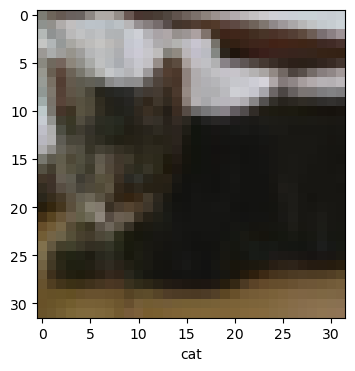

In [64]:
showImage(X_train, y_train, 9)

#### Normalise the data

In [65]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [66]:
X_train = X_train / 255
X_test = X_test / 255

In [67]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

#### Build Model

In [70]:
model = Sequential()

# Add 1st layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add 2nd layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add 3rd layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Output layer
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))  # Adjust dropout rate as needed
model.add(Dense(units=10, activation="softmax"))

#### Compile the Model

##### Optimizer

In [71]:
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate value as needed

In [92]:
model.compile(
    optimizer = optimizer,
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

#### Train Model

In [73]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.3093 - loss: 1.8611 - val_accuracy: 0.5281 - val_loss: 1.3288
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5222 - loss: 1.3252 - val_accuracy: 0.5940 - val_loss: 1.1403
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6005 - loss: 1.1262 - val_accuracy: 0.6501 - val_loss: 1.0042
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6542 - loss: 0.9858 - val_accuracy: 0.6658 - val_loss: 0.9500
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6880 - loss: 0.8971 - val_accuracy: 0.6719 - val_loss: 0.9346
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7120 - loss: 0.8312 - val_accuracy: 0.6963 - val_loss: 0.8731
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7340 - loss: 0.7562 - val_accuracy: 0.7191 - val_loss: 0.8088
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7560 - loss: 0.6895 - val_accu

In [74]:
# Extract the training and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_loss : [1.641356348991394, 1.2677385807037354, 1.0981199741363525, 0.98000168800354, 0.8929710388183594, 0.8297983407974243, 0.7623167037963867, 0.7048617005348206, 0.6567032933235168, 0.6244633793830872]
val_loss : [1.328771710395813, 1.1403112411499023, 1.0041733980178833, 0.9500377774238586, 0.9346224665641785, 0.8731207251548767, 0.8087683320045471, 0.8118607997894287, 0.8447973728179932, 0.8038071990013123]


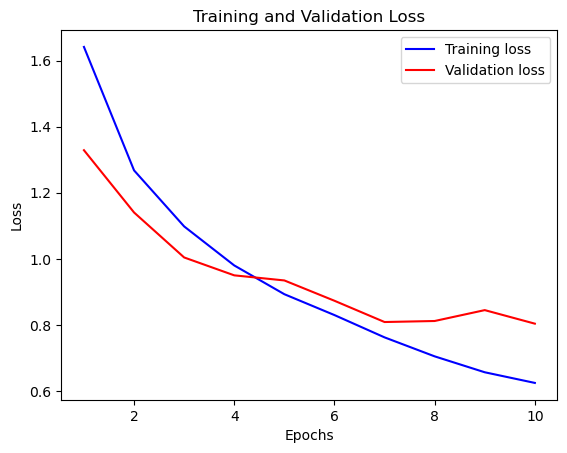

In [75]:
# Plot the learning curve
print(f"train_loss : {train_loss}")
print(f"val_loss : {val_loss}")
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Make Predictions

In [76]:
y_predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [77]:
y_predictions[9]

array([1.03845280e-02, 5.09099245e-01, 6.88409855e-05, 1.24459752e-04,
       6.13397469e-06, 1.37904435e-05, 1.66718135e-04, 2.38226290e-04,
       2.48167058e-03, 4.77416426e-01], dtype=float32)

In [78]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [80]:
y_tes = y_test.reshape(-1, )

Predicted Result: dog
Actual Result


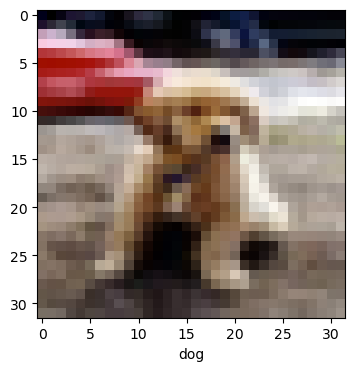

In [100]:
#insert any image number
from random import randrange
image = randrange(10000)

#the Predicted result
classes = y_predictions[image]
print(f"Predicted Result: {y_classes[classes]}")


#the actual image
print("Actual Result")
showImage(X_test, y_tes, image)

#### Evaluate Model

In [82]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [83]:
from keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [84]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7407 - loss: 0.7900


[0.8034238219261169, 0.7318999767303467]

The first value (0.8599853515625) represents the loss value of the model on the test data (X_test and y_test). 
This value indicates how well the model is performing in terms of its ability to minimize the error between the 
predicted outputs and the actual labels. In general, lower loss values indicate better performance.

The second value (0.7195000052452087) represents the accuracy of the model on the test data. This value indicates 
the proportion of correctly classified samples in the test dataset. In other words, it represents the model's 
ability to make correct predictions. Accuracy values range from 0 to 1, where 1 indicates perfect accuracy and 
0 indicates no accuracy.

So, in this case:

The loss value is approximately 0.86.
The accuracy is approximately 0.7195 or 71.95%.

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1000
           1       0.88      0.82      0.85      1000
           2       0.65      0.57      0.61      1000
           3       0.63      0.50      0.56      1000
           4       0.65      0.70      0.67      1000
           5       0.64      0.68      0.66      1000
           6       0.65      0.90      0.75      1000
           7       0.82      0.71      0.76      1000
           8       0.86      0.82      0.84      1000
           9       0.82      0.83      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



#### Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
cm = confusion_matrix(y_test, y_predictions)

In [89]:
cm

array([[780,  15,  54,  16,  26,   4,  22,   7,  51,  25],
       [ 22, 820,   9,   7,   6,   3,  17,   5,  25,  86],
       [ 55,   2, 575,  42, 105,  74, 108,  22,  10,   7],
       [ 15,   8,  75, 498,  62, 159, 119,  36,  11,  17],
       [ 16,   3,  46,  34, 700,  39, 113,  42,   5,   2],
       [ 12,   0,  48, 112,  56, 679,  56,  30,   3,   4],
       [  2,   2,  21,  27,  22,  11, 902,   4,   7,   2],
       [ 16,   4,  33,  32,  87,  71,  27, 712,   2,  16],
       [ 73,  23,  10,  11,  13,   8,  14,   2, 820,  26],
       [ 28,  51,   9,  14,   4,   5,  20,  12,  24, 833]])

In [90]:
import seaborn as sns

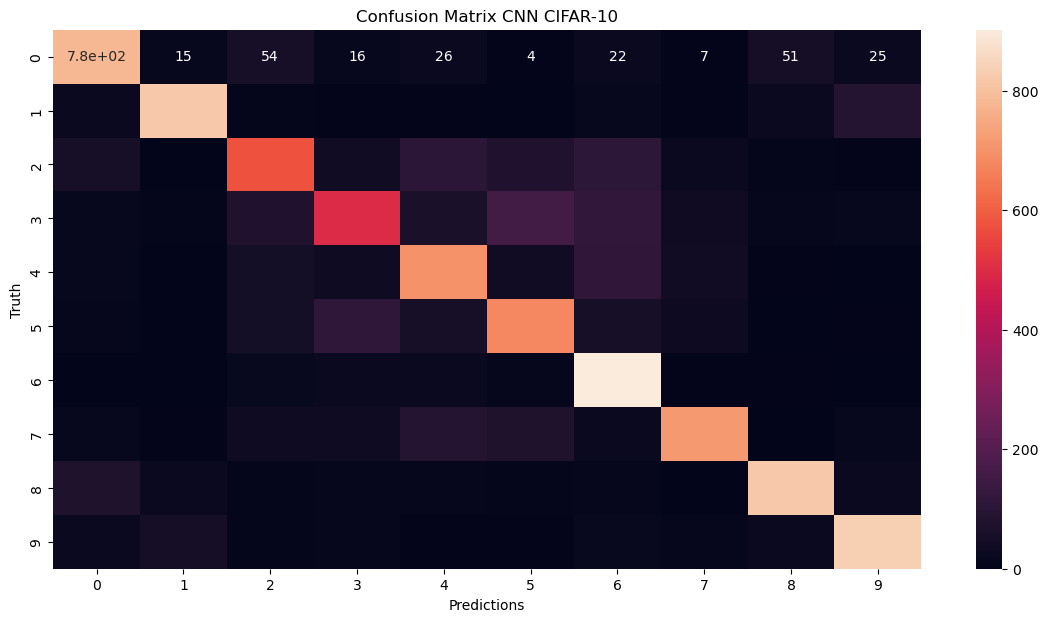

In [91]:
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True, cbar=True)  # Adjust the colormap as needed
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix CNN CIFAR-10")
plt.show()